<a href="https://colab.research.google.com/github/isabellacadisco/text-data-for-trading-/blob/main/News_scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
from bs4 import BeautifulSoup

offset = 0
max_offset = 1649*3
offset_increment = 12

BASE_URL = 'http://www.forexrate.co.uk/'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
news_archive = []

for i in range(0,max_offset,offset_increment):
  url = f'http://www.forexrate.co.uk/newsarchive.php?start={i}'
  print(url)
  page = requests.get(url)
  soup = BeautifulSoup(page.content, 'html.parser')
  tables = soup.findChildren('table')
  news_table = tables[1]
  rows = news_table.findChildren(['th', 'tr'])

  for idx,row in enumerate(rows):
    if idx == 0:
        continue
    cells = row.findChildren('td')
    for idx,cell in enumerate(cells):
      txt = cell.text
      href = cell.find('a')['href']
      href = BASE_URL + href.replace('./','')
      if "newsarchive.php?start=" in href:
        continue
      # let's get the date of the article
      date_page = requests.get(href)
      date_soup = BeautifulSoup(date_page.content, 'html.parser')
      date_div = date_soup.findChildren('div')[3]
      date_str = date_div.text
      news_archive.append({'txt':txt,'url':href,'date':date_str})
      print(len(news_archive), date_str, {'txt':txt,'url':href,'date':date_str})
      #print(value, href)
  #print(len(news_archive))

#print(news_archive)

http://www.forexrate.co.uk/newsarchive.php?start=0
1 13-06-2023 02:41 {'txt': "\nCrude Oil - Brent Oil: Break below $70 could accelerate decline to $65/63 – SocGen\n\t\t\tEUR/USD is trading above 1.0800, flirting with monthly highs after Germany's Economic Sentiment unexpectedly improved to -8.5 in June. The pair remains on the front foot as the US Dollar tracks the US ...\t\t", 'url': 'http://www.forexrate.co.uk/Crude-Oil---Brent-Oil--Break-below--70-could--news1686651728.html', 'date': '13-06-2023 02:41'}
2 13-06-2023 01:25 {'txt': "\nSilver Price - Silver Price Analysis: XAG/USD sticks to gains above $24.00, bulls have the upper hand\n\t\t\tSilver regains strong positive traction on Tuesday and reverses a major part of the previous day's slide to sub-$23.00 levels. The white metal maintains its bid ton through the first half of the ...\t\t", 'url': 'http://www.forexrate.co.uk/Silver-Price---Silver-Price-Analysis--XAG-USD-news1686651724.html', 'date': '13-06-2023 01:25'}
3 12-06-2023

In [ ]:
import pandas as pd

df = pd.DataFrame(news_archive)

In [ ]:
df

,txt,url,date
0,\nCrude Oil - Brent Oil: Break below $70 could...,http://www.forexrate.co.uk/Crude-Oil---Brent-O...,13-06-2023 02:41
1,\nSilver Price - Silver Price Analysis: XAG/US...,http://www.forexrate.co.uk/Silver-Price---Silv...,13-06-2023 01:25
2,\nOil Price - USD/CAD hangs near one-month low...,http://www.forexrate.co.uk/Oil-Price---USD-CAD...,12-06-2023 02:04
3,\nUSDJPY - USD/JPY faces extra range bound nea...,http://www.forexrate.co.uk/USDJPY---USD-JPY-fa...,12-06-2023 00:30
4,\nGold Price - Gold bound for weekly gain on F...,http://www.forexrate.co.uk/Gold-Price---Gold-b...,09-06-2023 03:16
...,...,...,...
2677,\nBitcoin dives double-digits as South Korea p...,http://www.forexrate.co.uk/Bitcoin-dives-doubl...,11-01-2018 08:04
2678,\nCommodities: WTI futures gain after DoE inve...,http://www.forexrate.co.uk/Commodities--WTI-fu...,04-01-2018 18:14
2679,\nCommodities: Energy futures jump on US inven...,http://www.forexrate.co.uk/Commodities--Energy...,03-01-2018 17:55
2680,"\nFX round-up: Pound jumps, JP Morgan sees ""pe...",http://www.forexrate.co.uk/FX-round-up--Pound-...,02-01-2018 20:41


Si ferma a 2018

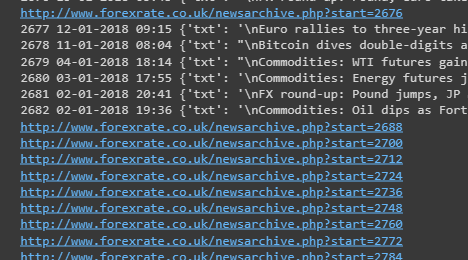

In [ ]:
df.to_csv('/content/drive/MyDrive/Ammagamma Lab Project/news_archive.csv', index=False)